# OpenDC Demo 4
### Failures

In the [experiment 1](1.first_experiment.ipynb), we learned how to run OpenDC experiments, and how to analyze and visualize the results to learn about the behavior of a data center. In this demo we are using OpenDC to determine the impact of horizontal scaling. Horizontal scaling refers to reducing (or increasing) the number of machines available in a data center to better fit a workload.

In this demo we will explore how machine failure can impact the performance of a data center. We run the same workload on data centers that are experiencing different levels of machine failure. 


# Failures

Failure cause hosts to stop periodically. In OpenDC, failures can be simulated by providing a trace. 
This trace describes when failures occur, how long they are, and how intens (how many hosts are effected). 

In this demo, we will investigate the effect of failures.

#### Lets start by looking at one of the failure traces.

In [2]:
import pandas as pd

df_failure = pd.read_parquet("failure_traces/Facebook_user_reported.parquet")

df_failure

,failure_interval,failure_duration,failure_intensity
0,0,14400000,1.000000
1,1200000,19200000,1.000000
2,1200000,6000000,0.666667
3,1200000,6000000,1.000000
4,1200000,1200000,0.833333
...,...,...,...
4064,13200000,1200000,0.500000
4065,194400000,2400000,1.000000
4066,280800000,1200000,0.666667
4067,332400000,2400000,0.833333


- *failure_interval* determines the time between failures
- *failure_duration* determines how long a machine cannot be used
- *failure_intensity* determines the ratio of machines affected by the failure.

## Experiment

A user can activate the use of failures by adding it to the Experiment file as shown below:


For this we need to run two simulations, one using an experiment file similar to the one used in the previous demo. You can find the file [here](experiments/2.no_failures.json)

Next, we make an experiment with failures. To do this we need to add a "failureModel" to the experiment file. 
This results in the experiment file that can be found [here](experiments/2.Facebook_failures.json), and is shown below:

```json
{
    "outputFolder": "output/4.failures",
    "topologies": [
        {
            "pathToFile": "topologies/4.failures/surfsara_small.json"
        }
    ],
    "workloads": [
        {
            "pathToFile": "workload_traces/surf_week",
            "type": "ComputeWorkload"
        }
    ],
    "failureModels": [
        {
            "type": "no"
        },
        {
            "type": "trace-based",
            "pathToFile": "failure_traces/Facebook_user_reported.parquet"
        }
    ],
    "exportModels": [
        {
            "exportInterval": 3600,
            "printFrequency": 24,
            "filesToExport": [
                "host",
                "powerSource",
                "service",
                "task"
            ]
        }
    ]
}
```

Failures are added using the "failureModels" parameter. In this experiment, we run two simulations. One without any failures, and one simulation in which the data center injected with failures based on the Facebook_user_reported failure trace. 

#### Exercise 1: 
Extend the experiment file located [here](experiments/4.failures/failure_experiment.json) with more failure traces. See the [failure_traces](failure_traces) folder for all available traces.

In [3]:
import subprocess

pathToScenario = "experiments/4.failures/failure_experiment.json"
subprocess.run(["OpenDCExperimentRunner/bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario])



 Running scenario: 0 
 Starting seed: 0 


Simulating...   0% [                                       ] 0/4 (0:00:00 / ?) 

09:38:44.516 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 24 hours:
						Tasks Total: 551
						Tasks Active: 124
						Tasks Pending: 0
						Tasks Completed: 427
						Tasks Terminated: 0

09:38:44.673 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 48 hours:
						Tasks Total: 1024
						Tasks Active: 78
						Tasks Pending: 0
						Tasks Completed: 946
						Tasks Terminated: 0

09:38:44.805 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 72 hours:
						Tasks Total: 1421
						Tasks Active: 81
						Tasks Pending: 0
						Tasks Completed: 1340
						Tasks Terminated: 0

09:38:44.976 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 96 hours:
						Tasks Total: 2037
						Tasks Active: 130
						Tasks Pending: 0
						Tasks Completed: 1907
						Tasks Terminated: 0

09:38:45.164 [WARN ] org.opendc.compute.simulator.tel

Simulating...  25% [========                         ] 1/4 (0:00:03 / 0:00:09) 

09:38:46.485 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136506,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:46.617 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 192 hours:
						Tasks Total: 6295
						Tasks Active: 5
						Tasks Pending: 5530
						Tasks Completed: 669
						Tasks Terminated: 91

09:38:46.632 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2138232,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:46.654 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136447,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:46.654 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136725,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:46.654 [WARN ] org.opendc.compute.simulator.service.Comput

Simulating...  50% [================                 ] 2/4 (0:00:08 / 0:00:08) 

09:38:51.696 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136690,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:51.697 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136494,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:51.697 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136497,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:51.697 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2134118,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:51.697 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2135709,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:51.697 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2137531,name=null,state=PROVISIONING] has

Simulating...  75% [========================         ] 3/4 (0:00:15 / 0:00:05) 

09:38:58.645 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2135709,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:58.770 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 144 hours:
						Tasks Total: 3918
						Tasks Active: 12
						Tasks Pending: 3877
						Tasks Completed: 28
						Tasks Terminated: 1

09:38:58.860 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2135698,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:58.927 [WARN ] org.opendc.compute.simulator.service.ComputeService - task Task[uid=2136329,name=null,state=PROVISIONING] has been terminated because it failed 10 times
09:38:59.175 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 168 hours:
						Tasks Total: 6295
						Tasks Active: 10
						Tasks Pending: 6250
						Tasks Completed: 32
						Tasks Terminated: 3



Simulating... 100% [=================================] 4/4 (0:00:27 / 0:00:00) 


CompletedProcess(args=['OpenDCExperimentRunner/bin/OpenDCExperimentRunner', '--experiment-path', 'experiments/4.failures/failure_experiment.json'], returncode=0)

*Note*: Because of the failures, not all tasks are able to be completed. 
When a task fails too many times, it is terminated from the system.

# Output

#### Exercise 2: 
Load the results into Pandas DataFrames


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_host_no = pd.read_parquet("output/4.failures/raw-output/0/seed=0/host.parquet")
df_powerSource_no = pd.read_parquet("output/4.failures/raw-output/0/seed=0/powerSource.parquet")
df_task_no = pd.read_parquet("output/4.failures/raw-output/0/seed=0/task.parquet")
df_service_no = pd.read_parquet("output/4.failures/raw-output/0/seed=0/service.parquet")

df_host_facebook = pd.read_parquet("output/4.failures/raw-output/1/seed=0/host.parquet")
df_powerSource_facebook = pd.read_parquet("output/4.failures/raw-output/1/seed=0/powerSource.parquet")
df_task_facebook = pd.read_parquet("output/4.failures/raw-output/1/seed=0/task.parquet")
df_service_facebook = pd.read_parquet("output/4.failures/raw-output/1/seed=0/service.parquet")

df_host_instagram = pd.read_parquet("output/4.failures/raw-output/2/seed=0/host.parquet")
df_powerSource_instagram = pd.read_parquet("output/4.failures/raw-output/2/seed=0/powerSource.parquet")
df_task_instagram = pd.read_parquet("output/4.failures/raw-output/2/seed=0/task.parquet")
df_service_instagram = pd.read_parquet("output/4.failures/raw-output/2/seed=0/service.parquet")

df_host_netflix = pd.read_parquet("output/4.failures/raw-output/3/seed=0/host.parquet")
df_powerSource_netflix = pd.read_parquet("output/4.failures/raw-output/3/seed=0/powerSource.parquet")
df_task_netflix = pd.read_parquet("output/4.failures/raw-output/3/seed=0/task.parquet")
df_service_netflix = pd.read_parquet("output/4.failures/raw-output/3/seed=0/service.parquet")

# Visualization

#### Exercise 3: 
Plot the number of tasks for each of the failure models

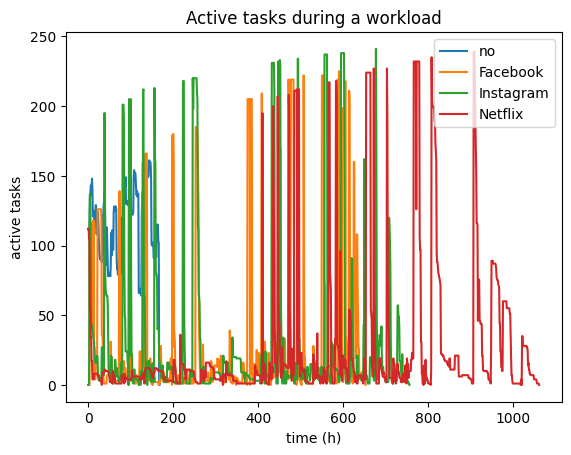

In [5]:
plt.plot(df_service_no.tasks_active, label="no")
plt.plot(df_service_facebook.tasks_active, label="Facebook")
plt.plot(df_service_instagram.tasks_active, label="Instagram")
plt.plot(df_service_netflix.tasks_active, label="Netflix")

plt.title("Active tasks during a workload")
plt.xlabel("time (h)")
plt.ylabel("active tasks")
plt.legend()
plt.show()

#### Exercise 4: 
Plot the energy usage of the datacenter for each of the failure models

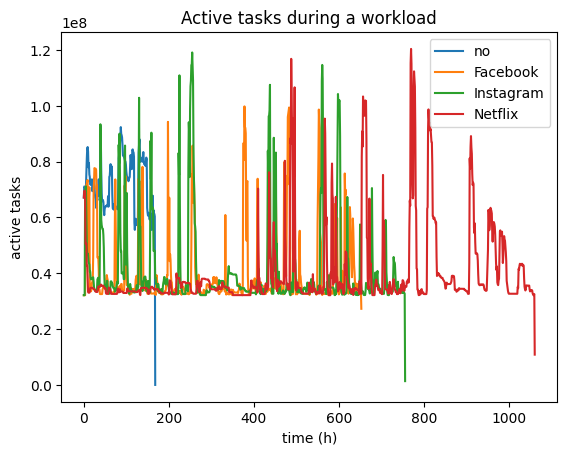

In [6]:
plt.plot(df_powerSource_no.energy_usage, label="no")
plt.plot(df_powerSource_facebook.energy_usage, label="Facebook")
plt.plot(df_powerSource_instagram.energy_usage, label="Instagram")
plt.plot(df_powerSource_netflix.energy_usage, label="Netflix")

plt.title("Active tasks during a workload")
plt.xlabel("time (h)")
plt.ylabel("active tasks")
plt.legend()
plt.show()

#### Lets compare the runtimes

#### Exercise 5: 
Print the runtime of the workload for each different failure model

In [7]:
runtime_no = pd.to_timedelta(df_service_no.timestamp.max() - df_service_no.timestamp.min(), unit="ms")

runtime_facebook = pd.to_timedelta(df_service_facebook.timestamp.max() - df_service_facebook.timestamp.min(), unit="ms")
runtime_instagram = pd.to_timedelta(df_service_instagram.timestamp.max() - df_service_instagram.timestamp.min(), unit="ms")
runtime_netflix = pd.to_timedelta(df_service_netflix.timestamp.max() - df_service_netflix.timestamp.min(), unit="ms")


print(f"The workload took {runtime_no} without failures")
print(f"The workload took {runtime_facebook} with facebook failures")
print(f"The workload took {runtime_instagram} with instagram failures")
print(f"The workload took {runtime_netflix} with netflix failures")


The workload took 6 days 23:00:00 without failures
The workload took 27 days 04:49:30 with facebook failures
The workload took 31 days 11:02:30 with instagram failures
The workload took 44 days 04:20:00 with netflix failures


#### Lets compare the runtimes

#### Exercise 6: 
Print the number of tasks that were terminated for each of the failure models

In [13]:
tasks_terminated_no = df_service_no.iloc[-1].tasks_terminated
tasks_terminated_facebook = df_service_facebook.iloc[-1].tasks_terminated
tasks_terminated_instagram = df_service_instagram.iloc[-1].tasks_terminated
tasks_terminated_netflix = df_service_netflix.iloc[-1].tasks_terminated

print(f"In the simulation without failures {tasks_terminated_no} tasks were terminated")
print(f"In the simulation with facebook failures {tasks_terminated_facebook} tasks were terminated")
print(f"In the simulation with instagram failures {tasks_terminated_instagram} tasks were terminated")
print(f"In the simulation with netflix failures {tasks_terminated_netflix} tasks were terminated")

In the simulation without failures 0 tasks were terminated
In the simulation with facebook failures 526 tasks were terminated
In the simulation with instagram failures 466 tasks were terminated
In the simulation with netflix failures 313 tasks were terminated
